<a href="https://colab.research.google.com/github/KhyatiMahendru/HappinessIndexAnalysis/blob/master/HappinessIndexAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from google.colab import files
uploaded = files.upload()

Saving WorldHappinessData.csv to WorldHappinessData (1).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['WorldHappinessData.csv']))

In [16]:
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
count,1420.000000,1420.000000,1385.000000,1408.000000,1411.000000,1386.000000,1328.000000,1336.000000,1403.000000,1409.000000,1225.000000,1128.000000,1129.000000,1420.000000,1420.000000
mean,2011.303521,5.428571,9.203860,0.811142,61.965278,0.723822,0.000201,0.755678,0.709873,0.260295,0.464820,-0.143355,-0.002564,1.983658,0.383186
std,3.149570,1.121719,1.183485,0.119286,8.198405,0.146490,0.159385,0.186446,0.107631,0.082701,0.178399,0.865859,0.961750,0.366721,0.114287
min,2005.000000,2.687553,6.354652,0.290184,36.167667,0.257534,-0.324367,0.035198,0.362498,0.083426,0.068769,-2.310710,-2.167530,0.863034,0.133908
25%,2009.000000,4.600384,8.306463,0.750623,57.029228,0.629931,-0.110767,0.698339,0.622200,0.202129,0.328487,-0.800332,-0.705457,1.732018,0.309646
50%,2011.000000,5.317440,9.378672,0.833718,63.782501,0.739609,-0.017912,0.810556,0.717980,0.249856,0.453570,-0.252632,-0.227479,1.948063,0.367580
75%,2014.000000,6.269866,10.159828,0.904155,67.936405,0.838298,0.092981,0.882902,0.802945,0.307471,0.592506,0.649054,0.671737,2.191734,0.445621
max,2016.000000,8.018934,11.815410,0.987343,76.408699,0.983803,0.542249,0.983276,0.943621,0.704590,0.979501,1.538103,2.200550,3.527820,1.022769


In [0]:
data1=data[data.year==2016]
data1=data1.reset_index(drop = True)

In [18]:
data1.head()

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,Afghanistan,Afghanistan,2016,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.324990,NaN,NaN,1.796219,0.425627
1,Albania,Albania,2016,4.511101,9.282300,0.638411,68.698380,0.729819,-0.017927,0.901071,0.675244,0.321706,0.400910,NaN,NaN,2.646668,0.586701
2,Algeria,Algeria,2016,5.388171,9.549138,0.748150,64.829948,NaN,NaN,NaN,0.668838,0.371372,NaN,NaN,NaN,2.109472,0.391501
3,Argentina,Argentina,2016,6.427221,NaN,0.882819,67.443993,0.847702,NaN,0.850924,0.841907,0.311646,0.419562,NaN,NaN,2.127109,0.330953
4,Armenia,Armenia,2016,4.325472,8.989569,0.709218,65.409470,0.610987,-0.155814,0.921421,0.593600,0.437228,0.184713,NaN,NaN,2.126364,0.491591


In [0]:
from sklearn.impute import SimpleImputer
X = data1.drop(['WP5 Country', 'country' ,'year', 'Life Ladder', 'Democratic Quality', 'Delivery Quality'], axis = 1).values
y = data1["Life Ladder"].values
imp = SimpleImputer(missing_values=np.nan ,strategy="mean") ## imputing missing values
X = imp.fit_transform(X)

In [0]:
np.random.seed(34)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X, y)

In [41]:
from sklearn.linear_model import LinearRegression as LR
alg=LR()
alg.fit(xtrain,ytrain)
print('Intercept: ',alg.intercept_)
print("Coefficients : ",alg.coef_)

Intercept:  1.845169717673365
Coefficients :  [ 0.19312163  0.98729015  0.00911693  0.21347966  1.08197935 -0.57807912
  0.94716352  0.96617867 -0.08653845  1.23398145 -6.78281717]


In [45]:
from sklearn.metrics import r2_score
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred)
ypred = alg.predict(xtest)
print('Accuracy of prediction on training set is : ', AccuracyScore(ytrain, alg.predict(xtrain)))
print('Accuracy of prediction on test set is : ', AccuracyScore(ytest, ypred))

Accuracy of prediction on training set is :  0.9220837439291737
Accuracy of prediction on test set is :  0.9062484630924165


# Data Visualisations and Correlations

In [0]:
import scipy as sp
def PearsonR(x,y):
    return(sp.stats.pearsonr(x,y))

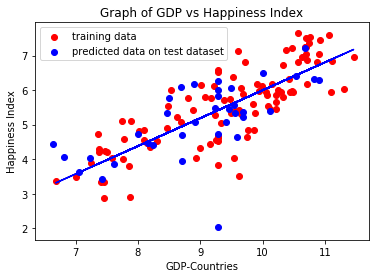

Correlation between data is :  0.6370358390071219


In [50]:
plt.scatter(xtrain[:,0],ytrain,color="red", label="training data")
plt.scatter(xtest[:,0],ypred,color="blue" ,label="predicted data on test dataset")
alg_pred=LR()
alg_pred.fit(xtrain[:,0].reshape(-1,1),ytrain)
plt.plot(xtrain[:,0],alg_pred.predict(xtrain[:,0].reshape(-1,1)),color="blue")
plt.xlabel("GDP-Countries")
plt.ylabel("Happiness Index")
plt.title("Graph of GDP vs Happiness Index")
plt.legend(loc='upper left')
plt.show()

# Metrics for judging the result, calculating correlation
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])

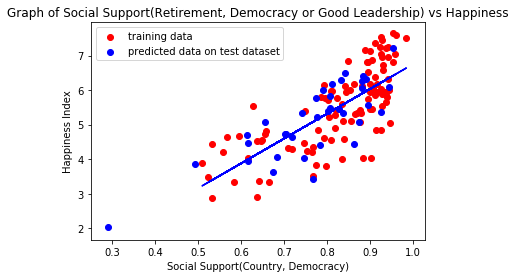

Correlation between data is :  0.7429338796711992


In [51]:
plt.scatter(xtrain[:,1],ytrain,color="red", label="training data")
plt.scatter(xtest[:,1],ypred,color="blue", label="predicted data on test dataset")
alg_pred=LR()
alg_pred.fit(xtrain[:,1].reshape(-1,1),ytrain)
plt.plot(xtrain[:,1],alg_pred.predict(xtrain[:,1].reshape(-1,1)),color="blue")
plt.xlabel("Social Support(Country, Democracy)")
plt.ylabel("Happiness Index")
plt.title("Graph of Social Support(Retirement, Democracy or Good Leadership) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,1]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])

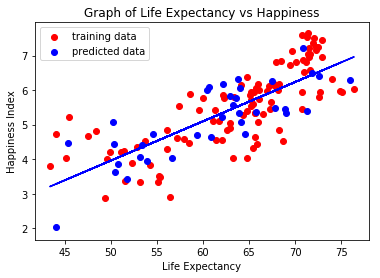

Correlation between data is :  0.7541589388014511


In [52]:
plt.scatter(xtrain[:,2],ytrain,color="red", label="training data")
plt.scatter(xtest[:,2],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,2].reshape(-1,1),ytrain)
plt.plot(xtrain[:,2],alg_pred.predict(xtrain[:,2].reshape(-1,1)),color="blue")
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness Index")
plt.title("Graph of Life Expectancy vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,2]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])

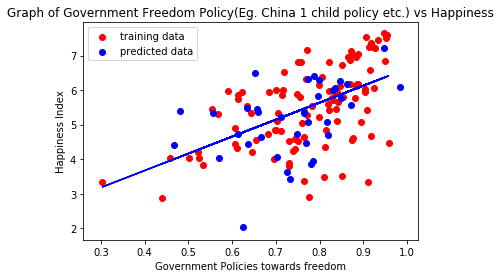

Correlation between data is :  0.43275977214116784


In [53]:
plt.scatter(xtrain[:,3],ytrain,color="red", label="training data")
plt.scatter(xtest[:,3],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,3].reshape(-1,1),ytrain)
plt.plot(xtrain[:,3],alg_pred.predict(xtrain[:,3].reshape(-1,1)),color="blue")
plt.xlabel("Government Policies towards freedom")
plt.ylabel("Happiness Index")
plt.title("Graph of Government Freedom Policy(Eg. China 1 child policy etc.) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,3]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])

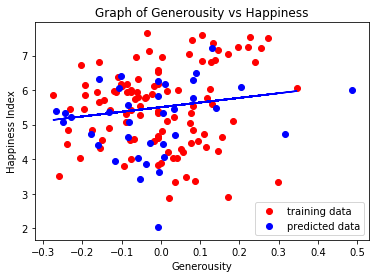

Correlation between data is :  0.06836845016296318


In [54]:
plt.scatter(xtrain[:,4],ytrain,color="red", label="training data")
plt.scatter(xtest[:,4],ypred,color="blue", label="predicted data")
# plt.scatter(xtest[:,0],ytest,color="black")
alg_pred=LR()
alg_pred.fit(xtrain[:,4].reshape(-1,1),ytrain)
plt.plot(xtrain[:,4],alg_pred.predict(xtrain[:,4].reshape(-1,1)),color="blue") 
plt.xlabel("Generousity")
plt.ylabel("Happiness Index")
plt.title("Graph of Generousity vs Happiness")
plt.legend(loc='lower right')

plt.show()
x=xtest[:,4]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])

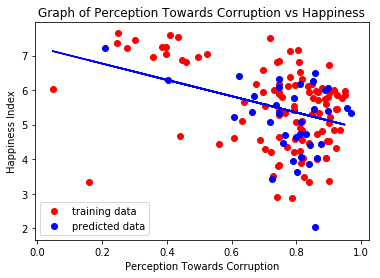

Correlation between data is :  -0.6370358390071219


In [55]:
plt.scatter(xtrain[:,5],ytrain,color="red", label="training data")
plt.scatter(xtest[:,5],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,5].reshape(-1,1),ytrain)
plt.plot(xtrain[:,5],alg_pred.predict(xtrain[:,5].reshape(-1,1)),color="blue")
plt.xlabel("Perception Towards Corruption")
plt.ylabel("Happiness Index")
plt.title("Graph of Perception Towards Corruption vs Happiness")
plt.legend(loc='lower left')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])

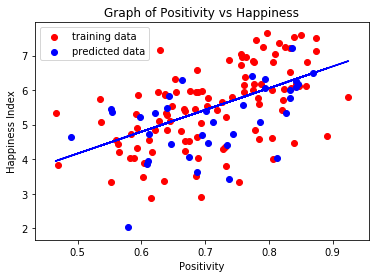

Correlation between data is :  0.6370358390071218


In [56]:
plt.scatter(xtrain[:,6],ytrain,color="red", label="training data")
plt.scatter(xtest[:,6],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,6].reshape(-1,1),ytrain)
plt.plot(xtrain[:,6],alg_pred.predict(xtrain[:,6].reshape(-1,1)),color="blue")
plt.xlabel("Positivity")
plt.ylabel("Happiness Index")
plt.title("Graph of Positivity vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])

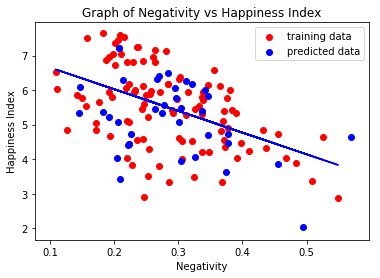

Correlation between data is :  -0.6370358390071219


In [57]:
plt.scatter(xtrain[:,7],ytrain,color="red", label="training data")
plt.scatter(xtest[:,7],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,7].reshape(-1,1),ytrain)
plt.plot(xtrain[:,7],alg_pred.predict(xtrain[:,7].reshape(-1,1)),color="blue")
plt.xlabel("Negativity")
plt.ylabel("Happiness Index")
plt.title("Graph of Negativity vs Happiness Index")
plt.legend(loc='upper right')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])